### Libraries

In [1]:
import importlib

import config as Config

import hangar.BomberFactory as BomberFactory

import models.firm as FirmModel
import models.funding as FundingModel
import models.investor as InvestorModel
import models.macro as MacroModel

import utils.file as FileUtils

### Configuration

In [2]:
args = {
  'country': 'united_states',
  'all': False,
}

### Load Data

#### Load Investor Data

In [3]:
# Read Investor Data
investors = FileUtils.read_pickle(f"investors")

In [4]:
# Get Public Funded Investors
public_funded_investors = InvestorModel.get_public_funded_investors(investors)

#### Load Company Data

In [5]:
# Read Company Data
firms = FileUtils.read_pickle(f"{args['country']}_firms")

In [6]:
# Read Domain Data
domain_created_year = FileUtils.read_pickle('domain_created_year')

In [7]:
# Filter and Enrich Company Data
firms = FirmModel.filter_for_profit(firms)
firms = FirmModel.enrich_founded_year(firms, domain_created_year)
firms = FirmModel.filter_founded_year(firms, Config.start_year, Config.end_year)
firms = FirmModel.enrich_public_funded(firms, public_funded_investors)
firms = firms.reset_index(drop=True)

#### Load Funding Data

In [8]:
# Read Funding Data
funding = FileUtils.read_pickle(f"funding")

In [9]:
# Filter and Enrich Funding Data
funding = FundingModel.filter_announced_year(funding, Config.start_year, Config.end_year)
funding = FundingModel.enrich_public_funded(funding, public_funded_investors)

#### Load Macro Data

In [10]:
# Read Macro Data
real_gdp = FileUtils.read_pickle('real_gdp')
fed_rate = FileUtils.read_pickle('fed_rate')

In [11]:
# Filter Macro Data
real_gdp = real_gdp['United States']
real_gdp = real_gdp[real_gdp.index >= Config.start_year]
real_gdp = real_gdp[real_gdp.index < Config.end_year]

fed_rate = fed_rate['Fed Rate']
fed_rate = fed_rate[fed_rate.index >= Config.start_year]
fed_rate = fed_rate[fed_rate.index < Config.end_year]

In [13]:
# Store Macro Data
macro = MacroModel.Macro(real_gdp, fed_rate)

### Preprocess Data

In [14]:
# Load Bombers
firmBomber = BomberFactory.FirmBomber(firms, macro)
# firmBomber = BomberFactory.FirmBomber(refurb=firmBomber)

In [15]:
# Load Bombers
fundBomber = BomberFactory.FundBomber(funding, macro)
# fundBomber = BomberFactory.FundBomber(refurb=fundBomber)

### Companies: By Industry

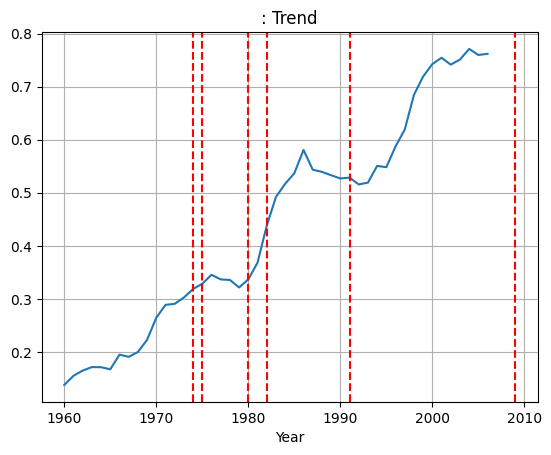

In [16]:
firmBomber.identify()
firmBomber.report()

### Funding: By Industry

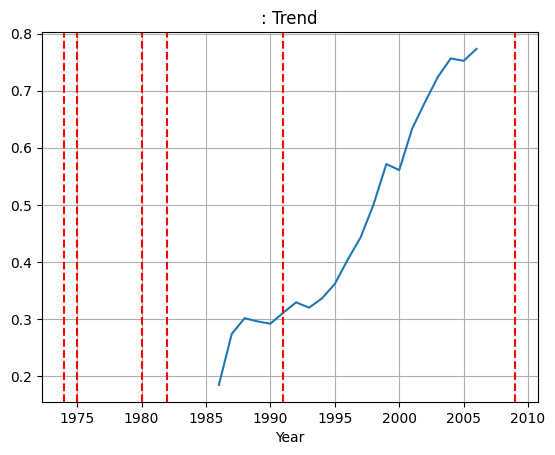

In [17]:
fundBomber.identify()
fundBomber.report()
